# Investigación Corta 1 


## Tutorial de Pandas de las operaciones mas comunes en **Pre-Procesado**
## Por: **David J Ramírez Arroyo**


### Importancia del Preprocesado
* Permite mejorar los resultados de los modelos aplicados en Proyectos de Machine Learning especialmente cuando estos datos deben de estar en una manera especifica. Ejemplo: Cuando algunos algoritmos no soportan algún estado especifico como "null values"
* Se busca que el pre-procesado aplicado pueda ser útil de una forma más generalizada para otros algoritmos de Machine Learning.
Iniciando con Pandas
Antes de Iniciar con las operaciones mas comunes utilizadas en pre-procesado es importante saber como cargar un 'Dataset'
1.	Es necesario buscar alguna fuente de información que desee utilizar, en este caso se utilizo se uso como referencia: https://github.com/MateLabs/Public-Datasets/blob/master/Datasets/iris.csv. El archivo .CSV se encuentra en el mismo directorio del ambiente de trabajo. En caso de utilizar otro path tener esto en consideración para escribir la ruta en *pd.read_csv('path')*
2.	Para verificar que está cargando el archivo con extensión CSV se utilizo *pf.head('Se especifica los datos que se desean mostrar')*


*Referencia:* 
https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/ 


In [345]:
import pandas as pd
import numpy as np

df = pd.read_csv('DataSet3.csv')
df.head(10)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,NaN,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,NaN,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**NOTA:** Los *'DataSet'* tambien se pueden generar en forma de un Arreglo como lo muestra el ejemplo a continuacion:

In [346]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


El DataSet que se creó anteriormente fue tomado del link a continuación con el fin de mostrar la organización de los datos para mostrar los datos en modo de una tabla tal y como se cargó de un CSV. 
Ref. https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

### Parte 1. Operaciones más comunes en Pre-Procesado

Dura la investigación fue común encontrar las siguientes operaciones para realizar algún tipo de preparación de los datos.

1. Añadir Valores por Defecto (Add default values)
2. Eliminar Columnas Incompletas (Remove incomplete rows)
3. Desviación Estándar
4. Reescalar los Datos (Rescale Data)
5. Binarizar Datos (Binarize Data)


#### 1. Añadir Valores por Defecto (Add default values)
En muchas ocasiones es necesario clasificar los datos de tal forma que permita al algoritmo graficar u organizar los datos de forma correcta. Los valores NaN pueden ser tomados en consideración dentro de alguna categoría y es por esto que se deben reemplazar los valore NaN con algún valor conocido (este podría estar dentro de un rango (*thershold*)) 

Ejemplo:
Con fines practicos se ha create un DataSet simple para mostrar la operacion de *Add*

In [347]:
DataSim = {'Nombre': ['David', 'Carlos', 'Juan', 'Ana', 'María'], 
        'Apellido': ['Rodriguez', 'Cambronero', 'Arroyo', 'Ramirez', 'Jimenez'], 
        'Edad': [28, 30, 21, 5, 58], 
        'Universidad': ['UCR', 'UNED','TEC', np.nan, np.nan],
        'Mod Celular': ["Huawei", "Iphone", "LG",np.nan, "Samsung"]}
df = pd.DataFrame(DataSim, columns = ['Nombre', 'Apellido', 'Edad', 'Universidad', 'Mod Celular'])
df


,Nombre,Apellido,Edad,Universidad,Mod Celular
0,David,Rodriguez,28,UCR,Huawei
1,Carlos,Cambronero,30,UNED,Iphone
2,Juan,Arroyo,21,TEC,LG
3,Ana,Ramirez,5,NaN,NaN
4,María,Jimenez,58,NaN,Samsung


**Nota.** Es importante notar que los Valores NaN son introducidos utilizando *numpy* como: **import numpy as np** al inicio. Es esperado ver errores si no es incluido o instalada dicha librería.

Para realizar el reemplazo de los Datos NaN se utiliza **fillna** y a este se le indico por el valor que se sustituirá.

Ver Documentación al respecto en:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html 


In [348]:
av = df.fillna('No Inscrito')
av

,Nombre,Apellido,Edad,Universidad,Mod Celular
0,David,Rodriguez,28,UCR,Huawei
1,Carlos,Cambronero,30,UNED,Iphone
2,Juan,Arroyo,21,TEC,LG
3,Ana,Ramirez,5,No Inscrito,No Inscrito
4,María,Jimenez,58,No Inscrito,Samsung


El Valor de *NaN* se sustituyo por *"No Inscrito"*.

#### 2. Eliminar Columnas Incompletas (Remove incomplete rows)

Eliminar Columnas incompletas puede ser un proceso un extremo sin embargo dependiendo del criterio puede ser un procedimiento útil en fases de Pre-Procesado.

Para este ejemplo se utilizó el DataSet *DataSet3.csv* cargado previamente con la diferencia que se usó una fracción de 15 filas.

Inicialmente se tiene los datos como se muestra a continuación
 

In [349]:
df = pd.read_csv('DataSet3.csv')
ex_data = df.head(11)
ex_data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,NaN,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,NaN,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**data.dropna()** elimina filas que contengan valores *NaN* 

In [350]:
rows_drop = ex_data.dropna()
rows_drop

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


**data.dropna(axis=1, how='any')** Elimina las columnas valores *NaN* como se puede observar en el ejemplo a continuación.

In [351]:
colm_drop = ex_data.dropna(axis=1, how='any')
colm_drop

,sepal length,petal length,petal width,species
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa
5,5.4,1.7,0.4,Iris-setosa
6,4.6,1.4,0.3,Iris-setosa
7,5.0,1.5,0.2,Iris-setosa
8,4.4,1.4,0.2,Iris-setosa
9,4.9,1.5,0.1,Iris-setosa


En otros casos es necesario agregar a los valores *NaN* algún valor conocido.

**data.fillna(data.mean())** En este caso los valores NaN serán reemplazados por la media de cada columna   


In [352]:
colm_fill = ex_data.fillna(ex_data.mean())
colm_fill

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.500,1.4,0.2,Iris-setosa
1,4.9,3.475,1.4,0.2,Iris-setosa
2,4.7,3.200,1.3,0.2,Iris-setosa
3,4.6,3.475,1.5,0.2,Iris-setosa
4,5.0,3.600,1.4,0.2,Iris-setosa
5,5.4,3.900,1.7,0.4,Iris-setosa
6,4.6,3.400,1.4,0.3,Iris-setosa
7,5.0,3.400,1.5,0.2,Iris-setosa
8,4.4,3.475,1.4,0.2,Iris-setosa
9,4.9,3.100,1.5,0.1,Iris-setosa



#### 3. Desviación Estandar (Outliers)

En muchas ocasiones es necesario sacar valores que están fuera de los 3 Sigma que se salen de los rangos "esperados" ya sea por mediciones de variables a nivel práctico por variabilidad de condiciones.

Se creo un arreglo que emula múltiples mediciones que tienen cierto rango esperado sin embargo se desea detectar esos datos "Anómalos"


In [353]:
import pandas as pd
import numpy as np

data_array = [1000,1026,1055,1074,1031,1077,1085,1063,1042,1067,1089,1081,1056,2,1]


In [354]:
elements = np.array(data_array)
print (elements)

[1000 1026 1055 1074 1031 1077 1085 1063 1042 1067 1089 1081 1056    2
    1]


De esta forma se eliminaron los datos *"1 y 2"*

In [355]:
mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in data_array if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print (final_list)


[1000, 1026, 1055, 1074, 1031, 1077, 1085, 1063, 1042, 1067, 1089, 1081, 1056]


#### 4. Reescalar los Datos (Rescale Data)

Es posible Reescalar los datos con la función fit_transform donde a esta se le debe parametrizar un valor de rango donde estarán los nuevos valores.


In [356]:
from sklearn.preprocessing import MinMaxScaler

Resc_data = {
       'Score':[62,-47,-55,74,31,77,85,63,42,67,89,81,56]}
 
df = pd.DataFrame(Resc_data,columns=['Score'])

scaler = MinMaxScaler(feature_range=(80, 100)) 

rescaledX = scaler.fit_transform(df)

np.set_printoptions(precision=3) 
print(rescaledX) 

[[ 96.25 ]
 [ 81.111]
 [ 80.   ]
 [ 97.917]
 [ 91.944]
 [ 98.333]
 [ 99.444]
 [ 96.389]
 [ 93.472]
 [ 96.944]
 [100.   ]
 [ 98.889]
 [ 95.417]]


#### 5. Binarizar Datos (Binarize Data)

Utilizando la función de Binarizer al arreglo de Datos y estableciendo un margen (Threshold) es posible convertir los datos de forma binaria esto es comúnmente utilizado cuando se cargan datos en forma de Strings y se necesita hacer algún tipo de operación matemática.


In [357]:
from sklearn.preprocessing import Binarizer

Norm_data = {
       'Score':[62,-47,-55,74,31,77,85,63,42,67,89,81,56]}
 
Norm_data_fRAME = pd.DataFrame(Norm_data,columns=['Score'])

binarizer = Binarizer(threshold=88).fit(Norm_data_fRAME) 
binaryX = binarizer.transform(Norm_data_fRAME)

np.set_printoptions(precision=3) 
print(binaryX)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


### Parte 2. Analisis Exploratorio de Datos (EDA)

En Estadística el Análisis Exploratorio de Datos (EDA) es un análisis que se para resumir información. Por medio de Métodos visuales para relevar conclusiones que puedan ser útiles a primera mano.

A se utilizaron algunos métodos diferentes para graficar información.

Para la utilización de los gráficos se utilizó matplotlib.pyplot que debe ser importada junto con las demás librerías.


In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

En este caso se utilizó un DataSet de enfermedades del corazón. Este cuenta con diferentes columnas y para nuestro caso el Dataset que se va a usar es de 300 datos.

A continuación se cargaron solo 20 archivos para verificar que se cargara de forma correcta por medio de la función read.


In [359]:
Heart_Disease_UCI = pd.read_csv('heart.csv') #Births and deaths: Year ended December 2018 – CSV
VariableBD = Heart_Disease_UCI.head(10)
VariableBD

#age in years
#sex:(1 = male; 0 = female)
#cp:chest pain type
#trestbps:resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg: resting electrocardiographic results
#thalach: maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#ca: number of major vessels (0-3) colored by flourosopy
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#target: 1 or 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Por medio de *".head"* se redimensionó la cantidad de datos que se manipularon en este caso *300*

In [360]:
VariableBD_plus = Heart_Disease_UCI.head(300) #Selección de 300 datos

#### Función .describe 

La función de *".describe"* permite hacer una primera revisión de los datos que han sido cargados y de esta manera tener una idea que otras metodologías pueden utilizarse para el análisis de los datos.

In [361]:
VariableBD_plus.describe()   #Es utilizado solo como funcion demostrativa ya que no en todos los casos aplica. 
                             #Cuando detecta caracteres elimina dichas columnas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.303333,0.683333,0.973333,131.593333,246.860000,0.146667,0.526667,149.710000,0.326667,1.034667,1.403333,0.723333,2.310000,0.550000
std,9.090661,0.465953,1.034176,17.610842,51.563064,0.354364,0.526192,22.883577,0.469778,1.157265,0.618004,1.024837,0.612495,0.498325
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Función .count

La función *'.count'* es comúnmente utilizado para de primera mano ver cuantos datos se están cargando de un DataSet.

In [362]:
VariableBD_plus['age'].count()

300

#### Gráficas .hist

Los gráficos de Barras se utilizan de gran medida para tener una primera impresión de cantidades que cuentan los individuos/objetos o variables que se analizaron.


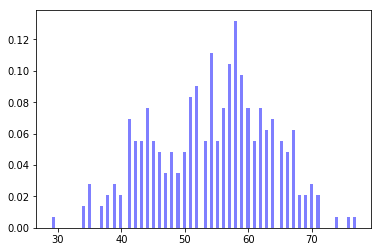

In [363]:
num_bins = 100
plt.hist(VariableBD_plus['age'], num_bins, density=1, facecolor='blue', alpha=0.5)
plt.show()
# Para mas información respecto a los parametros
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

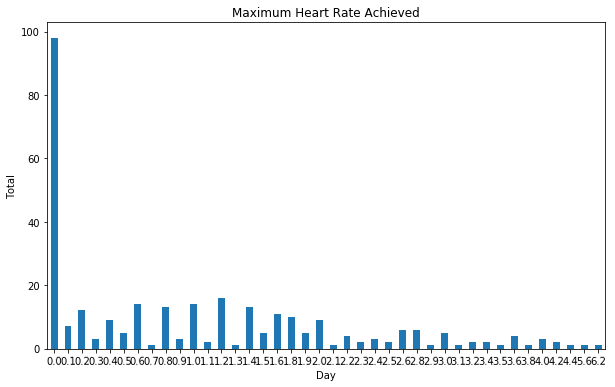

In [367]:

thalach_Variable = VariableBD_plus.groupby('oldpeak').size()
thalach_plot = thalach_Variable.plot.bar(title='Maximum Heart Rate Achieved',xticks=(range(60,200)),rot=1)

thalach_plot.set_xlabel('Day')
thalach_plot.set_ylabel('Total')
plt.rcParams['figure.figsize'] = (10,6)

#### Función de Agrupamiento .grupby

Dependiendo del análisis o comparación que se necesario utilizar debe compararse en grupos es por esto que para agrupar grupos de datos para analizar se utilizó la función *'groupby'*.
Seguidamente se graficó mostrando las etiquetas en colores distintos.


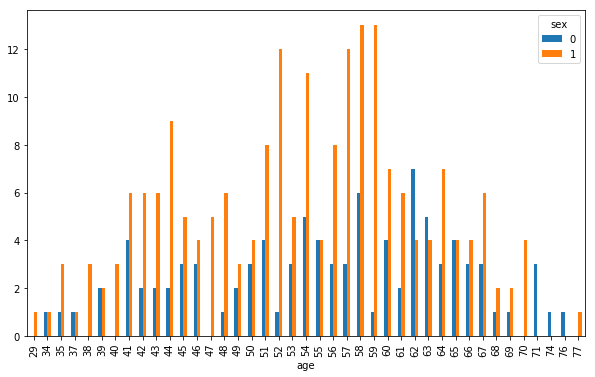

In [365]:
sexvar=VariableBD_plus.groupby(['age', 'sex']).size().unstack(fill_value=0)
#sexvar
VariableBD_plus.groupby(['age', 'sex']).size().unstack(fill_value=0).plot.bar()


In [366]:
plt.rcParams['figure.figsize'] = (10,6)   #Cambiar el Tamaño de los gráficas

Para mostrar valores de forma clara es importante mostrarlos a la escala adecuada para poder entender la información. 
Con *plt.rcParams['figure.figsize'] = (10,6)* es posible variar el tamaño por medio de los parámetros especificados 10,6


#### Función de crosstab

Para Realizar análisis de frecuencia (reiteracion de resultados) se deben agrupar los datos para clasificarlos. Esto es posible con la función **crosstab**.
Esta función pertenece a la libreria Pandas

In [371]:
pd.crosstab(VariableBD.sex, VariableBD.age)

age,37,41,44,52,56,57,63
sex,,,,,,,
0,0,1,0,0,1,1,0
1,1,0,1,1,1,2,1
